# Electrostatic Plasma wave

We will solve the simple electrostatic wave, define with :
\begin{equation}\label{eq:}
\epsilon(w,k) = 1 - Z'(w/k)/k^2
\end{equation}

with Z defined by Fried and Conte as : $Z = i \sqrt{\pi} w$, with:
\begin{equation}
w(z) = \frac{i}{\pi} \int_{-\infty }^{\infty } \frac{e^{-t^{2}}}{z-t} dt = \frac{2iz}{\pi} \int_{0}^{\infty} \frac{e^{-t^{2}}}{z^{2}-t^{2}} dt , \qquad  Im (z)>0
\end{equation}


In [4]:
from scipy.special import wofz as Faddeeva_function
import numpy as np
%matplotlib notebook

import sys
sys.path.append("../")
from fart import solver_tree
import matplotlib.pyplot as plt

In [2]:
def Z(zeta):
    Z = 1j * np.sqrt(np.pi) * Faddeeva_function(zeta)
    return Z

def Zp(zeta):
    Zp = -2*(1 + zeta*Z(zeta))
    return Zp

## Defining the function and its derivative

In [5]:
def electrostat(w, **kwargs):
    k = kwargs.get("k")
    return 1. - Zp(w/k)/k**2

def electrostat_prime(w, **kwargs):
    k = kwargs.get("k")
    Zs = Z(w/k)
    Zps = -2*(1 + w/k * Zs)
    return 2/k**3 * ( Zs + w/k*Zps)

# Solving the function

In [17]:
domain = (0, -2.0, 10.0, 0.2)
k = 0.3
s = solver_tree.Solver(electrostat, domain, max_depth= 10, deriv_function=electrostat_prime, k=k)
s.solve()
print(f" We found {len(s.zeros)} zeros")


 We found 15 zeros


<IPython.core.display.Javascript object>


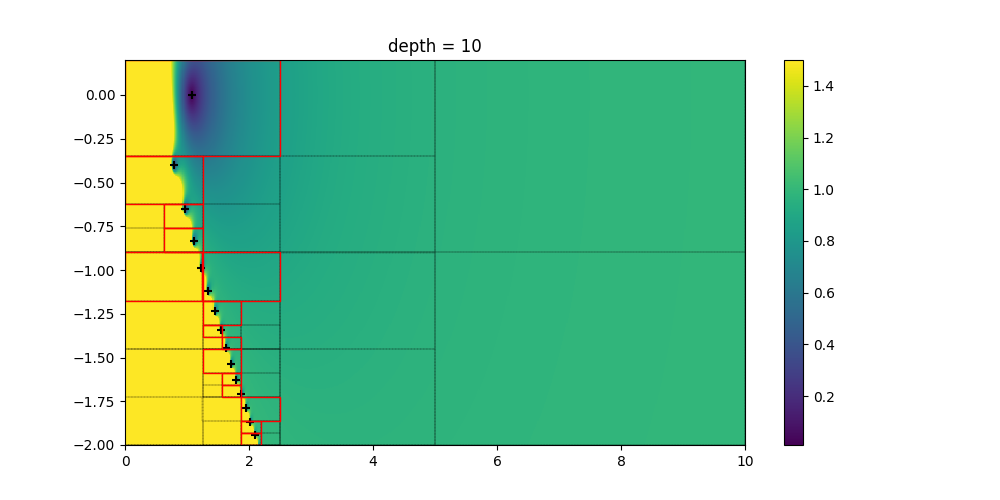

In [22]:
solver_tree.plot_tree(s, electrostat, domain, vmax=1.5, N=600, k=k)

# In function of k

In [32]:
def electrostat_prime_Over_electrostat(w, **kwargs):
    k = kwargs.get("k")
    chi = w/k
    Zs = Z(chi)
    Zps = -2*(1 + chi * Zs)
    return (2/k**3 * ( Zs + chi*Zps))/(1. - Zps/k**2)

In [42]:
Nk = 200
kmin = 0.5
kmax = 2
dk = (kmax-kmin)/(Nk-1)
k = kmin + np.arange(Nk)*dk
k = k[::-1]

In [45]:
solutions = []
precisions = []
for ik in k:
    s = solver_tree.Solver(electrostat, domain, max_depth= 20,
                           deriv_function=electrostat_prime_Over_electrostat, df_over_f=True, k=ik)
    s.solve()
    print(f"\r k={ik:2.2f}, {len(s.zeros)} found", end="")
    solutions.append( s.zeros) 
    precisions.append(s.precision())
    

 0.50, 6 found

<IPython.core.display.Javascript object>


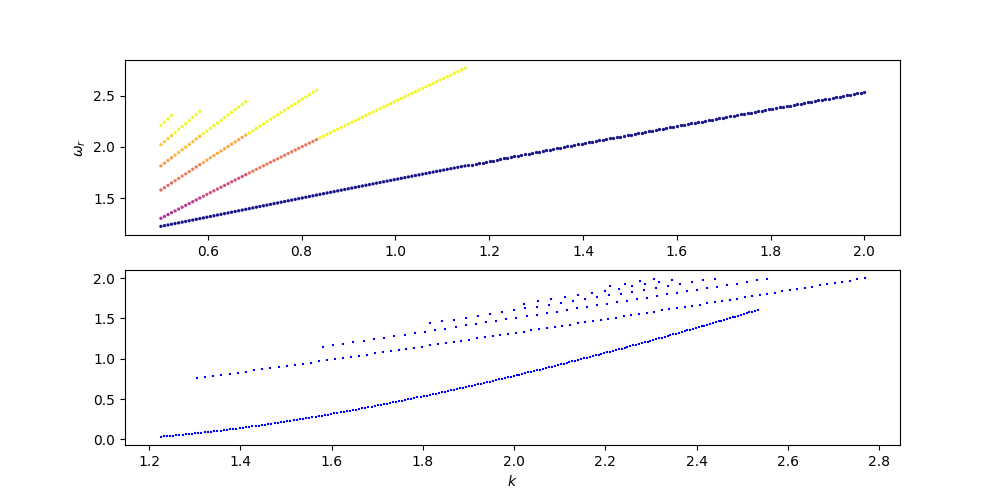

Text(0.5,0,'$k$')

In [46]:
f,[ax, ax2]=plt.subplots(2,figsize=(10,5))
for ik, sol in zip(k, solutions):
    vals = np.abs( np.imag(sol))
    alpha = vals
    ax2.scatter(np.real(sol),alpha, c="b", marker="+", s=1)
    ax.scatter(np.zeros(len(sol))+ik, np.real(sol) , marker="o", c = alpha, cmap="plasma", alpha = 0.9, s=2)

   
ax.set_ylabel(r"$\omega_r$")
ax2.set_xlabel(r"$k$")